# Custom Linear Regression Function

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
my_data = pd.read_csv("Salary_Data.csv")
X = my_data.iloc[:,:-1].values 
y = my_data.iloc[:,1].values

In [3]:
my_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


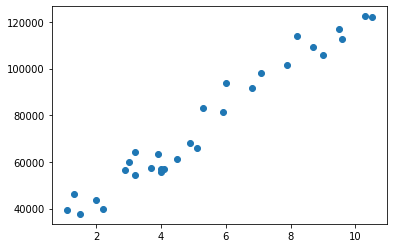

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
class LinearRegCustom:
    def __init__(self, lr=0.001):
        self.lr = lr
    def fit(self, X, y):
        self._X = X 
        self._y = y.reshape(-1, 1)
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        errors = []
        iter = 1000
        for i in range(iter):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    def gradient_decend(self):
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    def gradient(self):
        yh = self.predict(self._X)
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        return d_coef, d_intercept
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

WE HAVE TO CHOOSE THE VALUE OF lr AND iter accordingly

In [6]:
model = LinearRegCustom(lr=0.001)

In [7]:
errors = model.fit(X, y)

In [8]:
model.coef_, model.intercept_

(12316.027534825329, 6478.547425872843)

In [9]:
y_gen = X * model.coef_ + model.intercept_

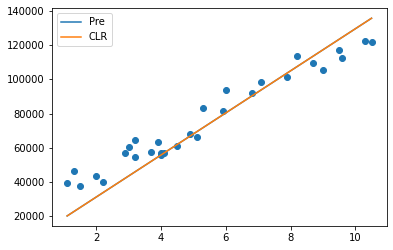

In [10]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()